<h1>這次主題:</h1>

用政府資料開放平臺的警政署犯罪資料，整理2020第一季主要的犯罪類別，以及這些主要犯罪類別最多發生在哪一些城市。<br>
資料來源：https://data.gov.tw/dataset/14200 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

Q1109data = pd.read_csv('10901-10903犯罪資料.csv')
Q1109data

,type,oc_dt,oc_p1
0,案類,發生日期,發生地點
1,住宅竊盜,1090101,高雄市鳳山區
2,住宅竊盜,1090102,金門縣金沙鎮
3,住宅竊盜,1090102,新北市汐止區
4,住宅竊盜,1090102,台北市中正區
...,...,...,...
8391,汽車竊盜,1090331,金門縣金寧鄉
8392,組織犯罪防制條例,1090113,新北市蘆洲區
8393,組織犯罪防制條例,1090302,新北市三重區
8394,說明 : 機車竊盜案件因發生地在路界、縣界等區域或報案,NaN,NaN


In [2]:
# dropping null value columns to avoid errors 
Q1109data.dropna(inplace = True) 

In [3]:
# 看犯罪種類
Q1109data['type'].drop_duplicates()

0             案類
1           住宅竊盜
302         強制性交
329           強盜
368           搶奪
406         機車竊盜
1684          毒品
8168        汽車竊盜
8392    組織犯罪防制條例
Name: type, dtype: object

In [4]:
# 看犯罪種類裡面的案件數
Q1109data['type'].value_counts()

毒品          6484
機車竊盜        1278
住宅竊盜         301
汽車竊盜         224
強盜            39
搶奪            38
強制性交          27
組織犯罪防制條例       2
案類             1
Name: type, dtype: int64

In [5]:
#手動輸入Q1109總犯罪表格
crimes = {'top3 crime types': ['毒品', '機車竊盜', '住宅竊盜', '汽車竊盜', '強盜', '搶奪', '強制性交','組織犯罪防制條例'], 
              'cases': [6484,1278,301,224,39,38,27,2]}
crimes_data = pd.DataFrame(crimes) 
crimes_data
#之後看可不可以輸出到csv檔

,top3 crime types,cases
0,毒品,6484
1,機車竊盜,1278
2,住宅竊盜,301
3,汽車竊盜,224
4,強盜,39
5,搶奪,38
6,強制性交,27
7,組織犯罪防制條例,2


In [6]:
#處理ocp1 - 把縣市抓出來
oldlist = list(Q1109data['oc_p1'])
newlist = []
for i in oldlist:
    newlist.append(i[0:3])
print(newlist)

['發生地', '高雄市', '金門縣', '新北市', '台北市', '雲林縣', '基隆市', '雲林縣', '新北市', '台北市', '新北市', '新北市', '雲林縣', '花蓮縣', '雲林縣', '台北市', '台北市', '雲林縣', '彰化縣', '台北市', '新北市', '新北市', '屏東縣', '新竹縣', '台南市', '台北市', '新竹市', '新竹市', '台北市', '新北市', '苗栗縣', '南投縣', '台南市', '新北市', '彰化縣', '雲林縣', '新北市', '南投縣', '新北市', '新北市', '台南市', '台南市', '苗栗縣', '南投縣', '台中市', '台北市', '苗栗縣', '新北市', '雲林縣', '台北市', '新北市', '台中市', '台南市', '台北市', '雲林縣', '台中市', '雲林縣', '台北市', '高雄市', '台北市', '新北市', '新北市', '新北市', '新北市', '新竹市', '苗栗縣', '宜蘭縣', '新竹縣', '新北市', '基隆市', '屏東縣', '新北市', '花蓮縣', '台中市', '新北市', '金門縣', '桃園市', '新北市', '嘉義縣', '新北市', '新北市', '連江縣', '彰化縣', '澎湖縣', '新北市', '基隆市', '台北市', '新北市', '雲林縣', '台南市', '基隆市', '台南市', '台南市', '高雄市', '台北市', '台南市', '台南市', '彰化縣', '苗栗縣', '台北市', '新北市', '澎湖縣', '台北市', '台北市', '高雄市', '雲林縣', '雲林縣', '基隆市', '新北市', '南投縣', '桃園市', '台北市', '宜蘭縣', '桃園市', '基隆市', '新北市', '新北市', '台北市', '新北市', '台南市', '新北市', '新北市', '新北市', '台北市', '台北市', '台中市', '台北市', '台北市', '台北市', '台北市', '南投縣', '新北市', '花蓮縣', '台北市', '新北市', '花蓮縣', '雲林縣', '南投縣', '台南市', '台中市', '雲林縣', '新北市', '屏東縣'

In [7]:
#再把新的ocp1欄位加入Q1109data, 顯示前5行做確認
Q1109data['new_oc_p1'] = newlist
Q1109data.head(5)

,type,oc_dt,oc_p1,new_oc_p1
0,案類,發生日期,發生地點,發生地
1,住宅竊盜,1090101,高雄市鳳山區,高雄市
2,住宅竊盜,1090102,金門縣金沙鎮,金門縣
3,住宅竊盜,1090102,新北市汐止區,新北市
4,住宅竊盜,1090102,台北市中正區,台北市


In [8]:
#抓出犯罪第一名毒品案件所有資料
filter_drug = Q1109data['type'] == '毒品'
Q1109data[filter_drug]

,type,oc_dt,oc_p1,new_oc_p1
1684,毒品,1090101,桃園市大園區,桃園市
1685,毒品,1090101,台北市士林區,台北市
1686,毒品,1090101,新北市三峽區,新北市
1687,毒品,1090101,新北市中和區,新北市
1688,毒品,1090101,台南市東區,台南市
...,...,...,...,...
8163,毒品,1090331,高雄市三民區,高雄市
8164,毒品,1090331,新北市板橋區,新北市
8165,毒品,1090331,台北市中山區,台北市
8166,毒品,1090331,台北市大同區,台北市


In [9]:
#抓出毒品案件中不同地區的資料量
Q1109data[filter_drug]['new_oc_p1'].value_counts()

桃園市    1170
新北市    1139
台北市     804
高雄市     680
台中市     574
台南市     453
屏東縣     267
彰化縣     188
基隆市     185
雲林縣     163
新竹縣     135
苗栗縣     116
南投縣     102
嘉義縣     101
宜蘭縣      98
花蓮縣      95
嘉義市      82
新竹市      66
台東縣      46
金門縣      12
澎湖縣       5
連江縣       3
Name: new_oc_p1, dtype: int64

In [10]:
#抓出犯罪第二名機車竊盜案件所有資料
filter_mbsteal = Q1109data['type'] == '機車竊盜'
Q1109data[filter_mbsteal]

,type,oc_dt,oc_p1,new_oc_p1
406,機車竊盜,1090101,台南市,台南市
407,機車竊盜,1090101,新竹市,新竹市
408,機車竊盜,1090101,新北市三峽區,新北市
409,機車竊盜,1090101,台中市,台中市
410,機車竊盜,1090101,苗栗縣,苗栗縣
...,...,...,...,...
1679,機車竊盜,1090331,桃園市,桃園市
1680,機車竊盜,1090331,宜蘭縣,宜蘭縣
1681,機車竊盜,1090331,新竹縣,新竹縣
1682,機車竊盜,1090331,新北市,新北市


In [11]:
#抓出機車竊盜案件中不同地區的資料量
Q1109data[filter_mbsteal]['new_oc_p1'].value_counts()

新北市    263
桃園市    258
高雄市    130
台中市    105
台北市     96
台南市     82
新竹縣     56
新竹市     42
屏東縣     41
雲林縣     32
苗栗縣     32
彰化縣     29
南投縣     28
宜蘭縣     26
基隆市     14
花蓮縣     13
嘉義縣     11
嘉義市     10
台東縣      8
         1
澎湖縣      1
Name: new_oc_p1, dtype: int64

In [12]:
#抓出犯罪第三名住宅竊盜案件所有資料
filter_hosteal = Q1109data['type'] == '住宅竊盜'
Q1109data[filter_hosteal]

,type,oc_dt,oc_p1,new_oc_p1
1,住宅竊盜,1090101,高雄市鳳山區,高雄市
2,住宅竊盜,1090102,金門縣金沙鎮,金門縣
3,住宅竊盜,1090102,新北市汐止區,新北市
4,住宅竊盜,1090102,台北市中正區,台北市
5,住宅竊盜,1090102,雲林縣虎尾鎮,雲林縣
...,...,...,...,...
297,住宅竊盜,1090328,花蓮縣吉安鄉,花蓮縣
298,住宅竊盜,1090329,台南市玉井區,台南市
299,住宅竊盜,1090329,台北市北投區,台北市
300,住宅竊盜,1090330,南投縣埔里鎮,南投縣


In [13]:
#抓出住宅竊盜案件中不同地區的資料量
Q1109data[filter_hosteal]['new_oc_p1'].value_counts()

台北市    67
新北市    62
台南市    27
雲林縣    24
南投縣    18
基隆市    15
台中市    12
苗栗縣    10
花蓮縣     9
彰化縣     9
高雄市     9
桃園市     6
金門縣     6
新竹市     6
屏東縣     6
澎湖縣     5
新竹縣     5
宜蘭縣     2
連江縣     1
嘉義縣     1
嘉義市     1
Name: new_oc_p1, dtype: int64

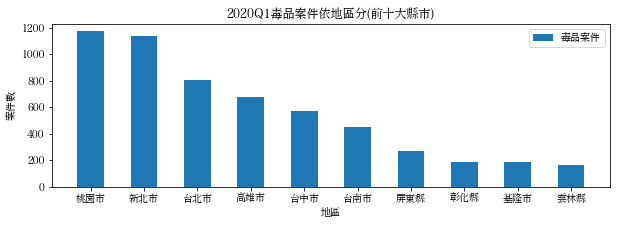

In [14]:
#用来正常顯示中文,但需找尋可用字體(Hiragino Mincho ProN是我本機可以用的)
plt.rcParams['font.sans-serif']=['Hiragino Mincho ProN'] 

#x軸先指定空位
x = range(10)
y = [1170,1139,804,680,574,453,267,188,185,163]
#指定x軸上的標籤
t1 = ['桃園市','新北市','台北市','高雄市','台中市',
      '台南市','屏東縣','彰化縣','基隆市','雲林縣']

plt.figure(figsize = (10,3)) #決定圖表大小
plt.bar(x, y, width = 0.5, tick_label=t1, label = '毒品案件') #匯入資料並設定圖形
plt.legend() #顯示圖例
plt.xlabel('地區')
plt.ylabel('案件數')
plt.title('2020Q1毒品案件依地區分(前十大縣市)')

plt.show()

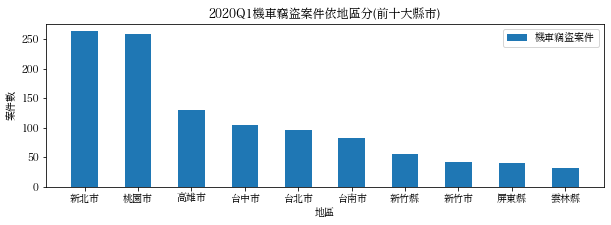

In [15]:
plt.rcParams['font.sans-serif']=['Hiragino Mincho ProN'] 

#x軸先指定空位
x = range(10)
y = [263,258,130,105,96,82,56,42,41,32]
#指定x軸上的標籤
t1 = ['新北市','桃園市','高雄市','台中市','台北市',
      '台南市','新竹縣','新竹市','屏東縣','雲林縣']

plt.figure(figsize = (10,3)) #決定圖表大小
plt.bar(x, y, width = 0.5, tick_label=t1, label = '機車竊盜案件') #匯入資料並設定圖形
plt.legend() #顯示圖例
plt.xlabel('地區')
plt.ylabel('案件數')
plt.title('2020Q1機車竊盜案件依地區分(前十大縣市)')

plt.show()

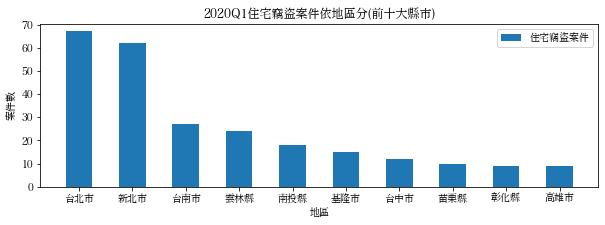

In [16]:
plt.rcParams['font.sans-serif']=['Hiragino Mincho ProN'] 

#x軸先指定空位
x = range(10)
y = [67,62,27,24,18,15,12,10,9,9]
#指定x軸上的標籤
t1 = ['台北市','新北市','台南市','雲林縣','南投縣',
      '基隆市','台中市','苗栗縣','彰化縣','高雄市']

plt.figure(figsize = (10,3)) #決定圖表大小
plt.bar(x, y, width = 0.5, tick_label=t1, label = '住宅竊盜案件') #匯入資料並設定圖形
plt.legend() #顯示圖例
plt.xlabel('地區')
plt.ylabel('案件數')
plt.title('2020Q1住宅竊盜案件依地區分(前十大縣市)')

plt.show()

In [17]:
#結論:
#Q1109犯罪案件種類前三名：毒品, 機車竊盜, 住宅竊盜
#Q1109毒品案件前三名縣市：桃園市, 新北市, 台北市
#Q1109機車竊盜案件前三名縣市：新北市, 桃園市, 高雄市
#Q1109住宅竊盜案件前三名縣市：台北市, 新北市, 台南市